In [1]:
# import and set options
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

## Feature importance assessment

We used the Mean Decrease in Gini Index (MDGI) as a measure of feature importance in the random forest. This measurement, however, has been previously noted to favor continuous features over discrete features with a small number of possible values {Altmann, 2010 #1}. We compensated for this phenomenon by calculating an adjusted z-score using a permutation-based approach. This involved calculating MDGI for each feature for 1,000 permutations, and calculating the z-score of the observed data by using the mean and standard deviation of the permutations. The permutations were carried out as follows: First, we randomly permuted the list of unique genes containing any missense mutation. Second, we assigned the first gene in the permuted list with the same fraction of driver/passenger mutations as our first gene containing labeled driver mutations in our training set. We then proceeded to the next gene in the list, and repeated the procedure, until the same number of labeled driver mutations as in our actual training set was reached. All other genes had their mutations labeled as passengers. Finally, we computed the MDGI for each feature based on the CHASMplus model on the permuted training data. Grouping by gene in the permutation was done to mimic the heuristic on how training data was labeled, and to avoid gene-level features from having artificially high feature importance.

In [2]:
# read result about feature importance
df = pd.read_table('CHASMplus/data/misc/feature_importance_result.txt')
df = df.sort_values('zscore', ascending=False)

# minor reformatting of some of the feature names
df['feature'] = df.feature.replace({
    'p.value..0.': 'HotMAPS 1D (w=0)',
    'p.value..5.': 'HotMAPS 1D (w=5)',
    'p.value..10.': 'HotMAPS 1D (w=10)'
})

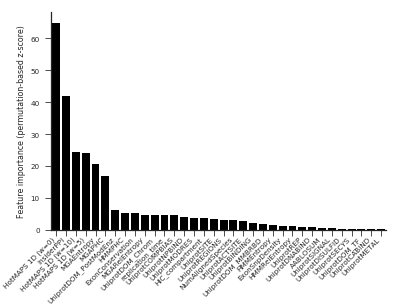

In [14]:
# plot the results
plot_df = df[df['zscore']>0]
with sns.axes_style('ticks'), sns.plotting_context('paper', font_scale=.9):
    sns.barplot(plot_df.feature, plot_df.zscore, color='black')
    sns.despine()
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right')
    plt.gca().tick_params(axis='x', which='major', pad=0)
    plt.ylabel('Feature importance (permutation-based z-score)')
    plt.xlabel('')
    plt.savefig('CHASMplus/figures/figure_1d.pdf')